<a href="https://colab.research.google.com/github/Syleshkumar1996/Time-series-forecasting-of-online-search-popularity/blob/main/Whitewine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import prophet
from fbprophet import Prophet

In [ ]:
df = pd.read_excel('7B21E009.xlsx',sheet_name = "WhiteWine")
df.rename(columns = {'Relative Interest':'White wine'}, inplace = True)
df['time_period']=df['Year'].astype('str') + '-' + df['Month'].astype('str')
df['time_period']=pd.to_datetime(df['time_period'])
df.drop(columns=['Year','Month'],axis=1,inplace=True)
df2=df.set_index('time_period')
df2

,White wine
time_period,
2010-01-01,54
2010-02-01,54
2010-03-01,58
2010-04-01,52
2010-05-01,61
...,...
2015-08-01,81
2015-09-01,72
2015-10-01,70


**MODEL TESTING**

In [ ]:

df3=df2.copy()
df3

,White wine
time_period,
2010-01-01,54
2010-02-01,54
2010-03-01,58
2010-04-01,52
2010-05-01,61
...,...
2015-08-01,81
2015-09-01,72
2015-10-01,70


In [ ]:
df3['SARIMAX']=np.nan
df3['Mean_Baseline']=np.nan
df3['Naive_Baseline']=np.nan
df3['Seasonal_Naive_Baseline']=np.nan
df3['Drift_Baseline']=np.nan
df3['Prophet']=np.nan
df3

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,81,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,NaN,NaN,NaN,NaN,NaN,NaN


**Model testing : SARIMA**

In [ ]:
df3['Seasonal First order difference']=df3['White wine']-df3['White wine'].shift(12)
df3

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet,Seasonal First order difference
time_period,,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2015-08-01,81,NaN,NaN,NaN,NaN,NaN,NaN,8.0
2015-09-01,72,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2015-10-01,70,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [ ]:
result_cb_first=adfuller(df3.iloc[12:,[7]])
print("p-value",result_cb_first[1])
if result_cb_first[1]<=0.05:
   print("Result of hypothesis testing:Reject Null hypothesis.The data series is stationary")
else:
   print("Result of hypothesis testing:Fail to reject Null hypothesis.The data series is not stationary")

p-value 0.04721302655286903
Result of hypothesis testing:Reject Null hypothesis.The data series is stationary


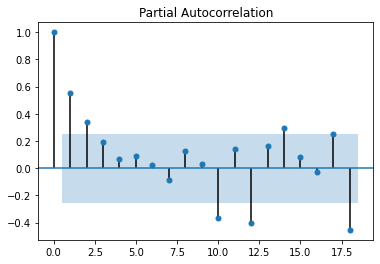

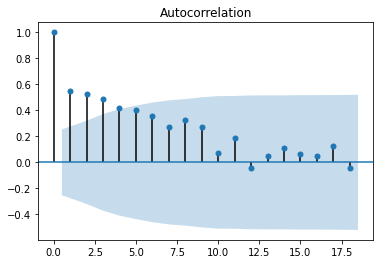

In [ ]:
plot_pacf(df3.iloc[12:,[7]])
plot_acf(df3.iloc[12:,[7]])
plt.show()

In [ ]:
df3.drop(columns='Seasonal First order difference',inplace=True)
df3

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,81,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,72,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-01,70,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
model_cb=sm.tsa.statespace.SARIMAX(df3.iloc[0:60,[0]],order=(2, 1, 4),seasonal_order=(2,1,4,12))
m_cb=model_cb.fit()
df3['SARIMAX']=m_cb.predict(start=60,end=72,dynamic=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate startin

**Model testing : Mean Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],2]=df3.iloc[0:60,[0]].mean()

**Model testing : Naive Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],3]=df3.iloc[[59],[0]]

**Model testing : Seasonal Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],4]=df3.iloc[[i-12],[0]]

**Model testing : Drift Baseline**

In [ ]:
for i in range(60,72):
  df3.iloc[[i],5]= (df3.iloc[59,0])+ ( ((df3.iloc[59,0] - df3.iloc[0,0])/59 )*(i-59))

**Model testing : Prophet**

In [ ]:
df3_prophet =df
df3_prophet.rename(columns={"White wine":"y","time_period":"ds"},inplace=True)
df3_prophet

,y,ds
0,54,2010-01-01
1,54,2010-02-01
2,58,2010-03-01
3,52,2010-04-01
4,61,2010-05-01
...,...,...
67,81,2015-08-01
68,72,2015-09-01
69,70,2015-10-01
70,83,2015-11-01


In [ ]:
model_prophet_testing=Prophet()
model_prophet_testing.fit(df3_prophet.iloc[0:60,:])
prediction_prophet_testing=model_prophet_testing.predict(df3_prophet.iloc[60:,[1]])
prediction_prophet_testing
for i in range(60,72):
  df3.iloc[[i],6]= prediction_prophet_testing.iloc[[i-60],[15]]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df3

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
time_period,,,,,,,
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-08-01,81,64.452689,71.616667,84.0,73.0,88.067797,76.111084
2015-09-01,72,63.728519,71.616667,84.0,68.0,88.576271,66.713320
2015-10-01,70,53.914723,71.616667,84.0,63.0,89.084746,65.612007


**Comparison of  Testing models**


In [ ]:
model_names=["SARIMAX","Mean Baseline","Naive Baseline","Seasonal Naive Baseline","Drift Baseline","Prophet"]
model_MAPE=[]
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[1]]))*100,2))   
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[2]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[3]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[4]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[5]]))*100,2))
model_MAPE.append(round((mean_absolute_percentage_error(df3.iloc[60:72,[0]],df3.iloc[60:72,[6]]))*100,2))

In [ ]:
dict_MAPE={'Model':model_names,'MAPE':model_MAPE}
df_MAPE=pd.DataFrame(dict_MAPE)
df_MAPE

,Model,MAPE
0,SARIMAX,12.73
1,Mean Baseline,8.62
2,Naive Baseline,11.34
3,Seasonal Naive Baseline,5.85
4,Drift Baseline,14.50
5,Prophet,5.29


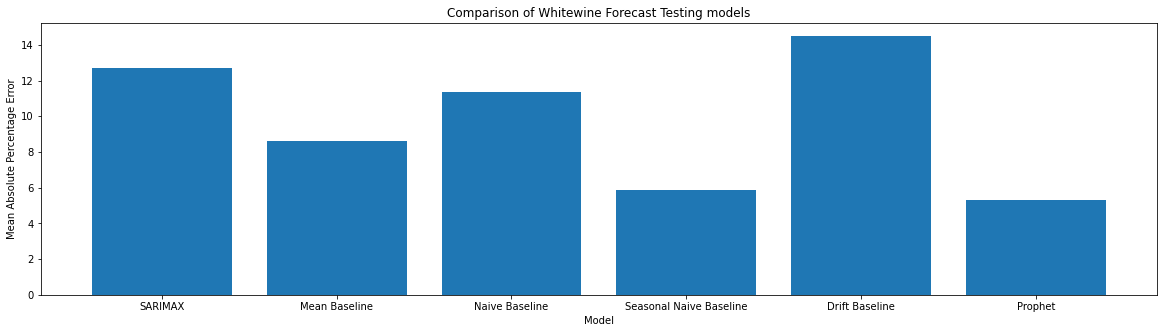

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.bar(df_MAPE.Model,df_MAPE.MAPE)
plt.xlabel("Model")
plt.ylabel("Mean Absolute Percentage Error")
plt.title("Comparison of Whitewine Forecast Testing models")
plt.show()

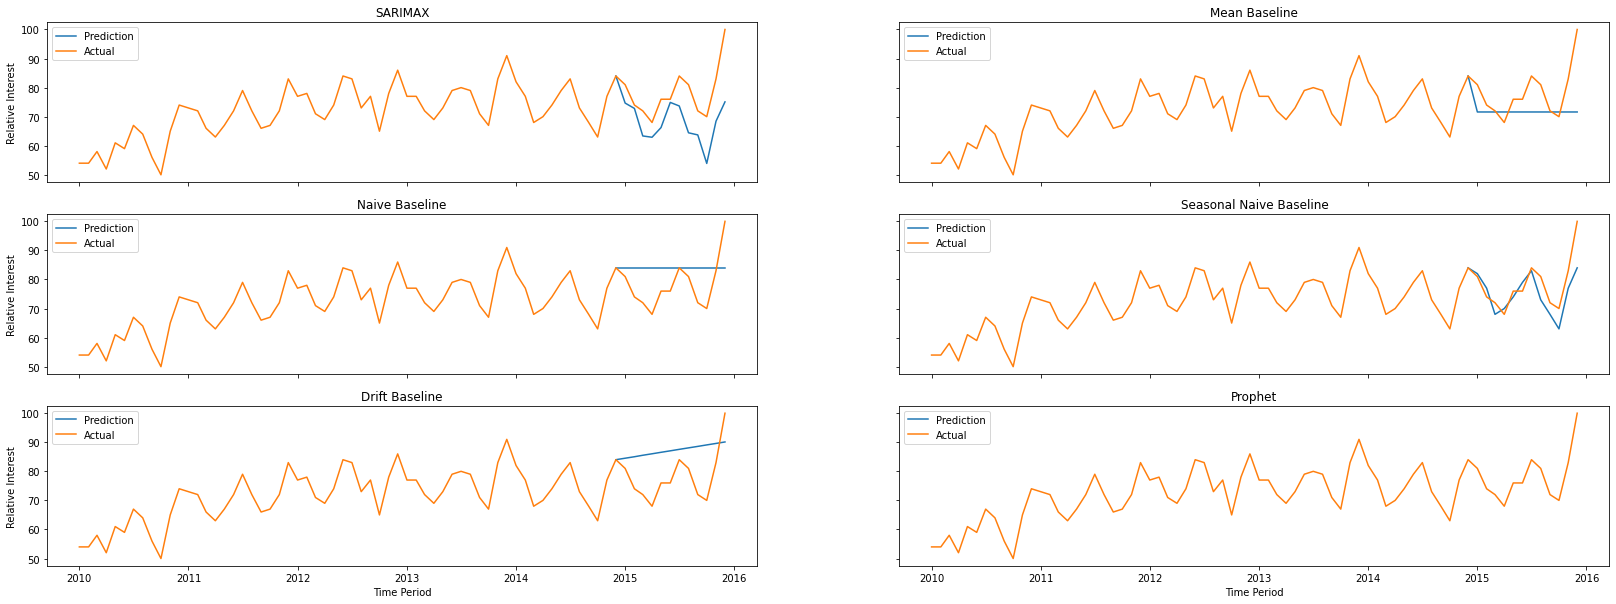

In [ ]:
for i in range(1,7):
  df3.iloc[[59],[i]]=df3.iloc[[59],[0]]
fig,axis=plt.subplots(3,2,figsize=(28,10))
for i in range(0,3):
   for j in range(0,2): 
      axis[i,j].plot(df3.index,df3.iloc[:,[((2*i)+j)+1]])
      axis[i,j].plot(df3.index,df3.iloc[:,[0]])
      axis[i,j].set(title=model_names[((2*i)+j)],xlabel="Time Period",ylabel="Relative Interest")
      axis[i,j].legend(['Prediction', 'Actual'],loc='upper left')
for axi in axis.flat:
    axi.label_outer()

**Forecast models**

In [ ]:
df4=df2.copy()
df4['SARIMAX']=np.nan
df4['Mean_Baseline']=np.nan
df4['Naive_Baseline']=np.nan
df4['Seasonal_Naive_Baseline']=np.nan
df4['Drift_Baseline']=np.nan
df4['Prophet']=np.nan
df4_forecast_dates=[df4.index[-1]+ DateOffset(months=x)for x in range(0,13)]
forecast_datest_df4=pd.DataFrame(index=df4_forecast_dates[1:],columns=df4.columns)
forecast_df4=pd.concat([df4,forecast_datest_df4])
forecast_df4

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
2010-01-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,54,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,58,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,52,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,61,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 **Forecast :SARIMAX**

In [ ]:
model_cb_2=sm.tsa.statespace.SARIMAX(df4.iloc[0:72,[0]],order=(2, 1, 2),seasonal_order=(2,1,2,12))
m_cb_2=model_cb_2.fit()
forecast_df4['SARIMAX'] = m_cb_2.predict(start = 72, end = 84, dynamic= True)  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


**Forecast  : Mean Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],2]=forecast_df4.iloc[0:72,[0]].mean()

**Forecast : Naive Baseline**

In [ ]:
for i in range(72,84):
 forecast_df4.iloc[[i],3]=df3.iloc[[71],[0]]

**Forecast : Seasonal Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],4]=forecast_df4.iloc[[i-12],[0]]

**Forecast : Drift Baseline**

In [ ]:
for i in range(72,84):
  forecast_df4.iloc[[i],5]= (forecast_df4.iloc[71,0])+ ( ((forecast_df4.iloc[71,0] - forecast_df4.iloc[0,0])/71 )*(i-71))

**Forecast : Prophet**

In [ ]:
df4_prophet =forecast_df4.iloc[:,[0]].copy()
df4_prophet=df4_prophet.reset_index()
df4_prophet.rename(columns={"White wine":"y","index":"ds"},inplace=True)
df4_prophet

,ds,y
0,2010-01-01,54
1,2010-02-01,54
2,2010-03-01,58
3,2010-04-01,52
4,2010-05-01,61
...,...,...
79,2016-08-01,NaN
80,2016-09-01,NaN
81,2016-10-01,NaN
82,2016-11-01,NaN


In [ ]:
model_prophet_forecast=Prophet()
model_prophet_forecast.fit(df4_prophet.iloc[0:72,:])
prophet_prediction_forecast=model_prophet_forecast.predict(df4_prophet.iloc[72:,[0]])
for i in range(72,84):
  forecast_df4.iloc[[i],6]= prophet_prediction_forecast.iloc[[i-72],[15]]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Visual representaiton of Forecasting models**

In [ ]:
for i in range(1,7):
  forecast_df4.iloc[[71],[i]]=forecast_df4.iloc[[71],[0]]
forecast_df4.tail(13)

,White wine,SARIMAX,Mean_Baseline,Naive_Baseline,Seasonal_Naive_Baseline,Drift_Baseline,Prophet
2015-12-01,100,100,100,100,100,100,100
2016-01-01,NaN,88.713578,72.694444,100,81,100.647887,83.077457
2016-02-01,NaN,86.130295,72.694444,100,74,101.295775,80.712518
2016-03-01,NaN,82.485394,72.694444,100,72,101.943662,76.40055
2016-04-01,NaN,80.883844,72.694444,100,68,102.591549,73.649361
2016-05-01,NaN,87.498238,72.694444,100,76,103.239437,77.671662
2016-06-01,NaN,91.308496,72.694444,100,76,103.887324,85.79287
2016-07-01,NaN,97.22436,72.694444,100,84,104.535211,84.95143
2016-08-01,NaN,91.68651,72.694444,100,81,105.183099,78.362832
2016-09-01,NaN,86.484509,72.694444,100,72,105.830986,79.214124


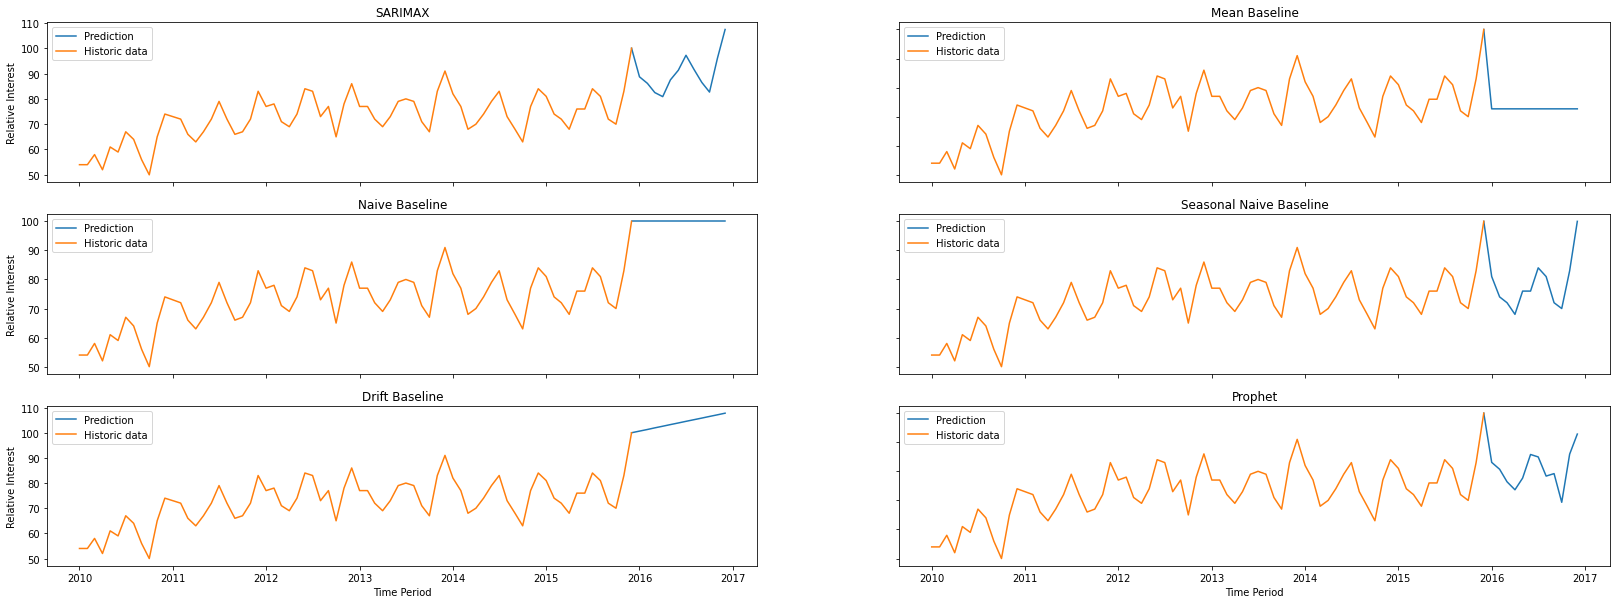

In [ ]:
fig,axis=plt.subplots(3,2,figsize=(28,10))
for i in range(0,3):
   for j in range(0,2): 
      axis[i,j].plot(forecast_df4.index,forecast_df4.iloc[:,[((2*i)+j)+1]])
      axis[i,j].plot(forecast_df4.index,forecast_df4.iloc[:,[0]])
      axis[i,j].set(title=model_names[((2*i)+j)],xlabel="Time Period",ylabel="Relative Interest")
      axis[i,j].legend(['Prediction', 'Historic data'],loc='upper left')
for axi in axis.flat:
    axi.label_outer()
